In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from nilearn import datasets, masking, plotting
import pandas as pd

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
data = datasets.fetch_development_fmri(n_subjects=1, age_group="adult")
func = data.func[0]
confounds = data.confounds[0]

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


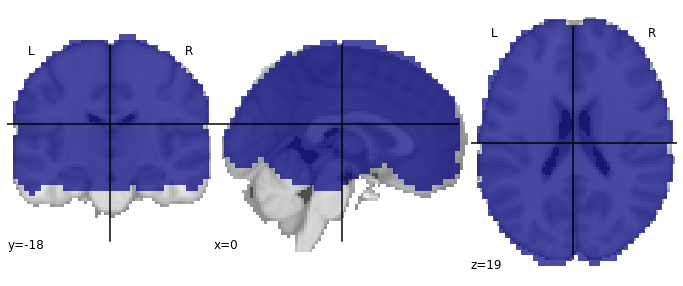

In [3]:
mask = "out/brainmask.nii.gz"
mask_img = masking.compute_epi_mask(func)
mask_img.to_filename(mask)
fig, ax = plt.subplots(figsize=(12, 5))
plotting.plot_roi(mask, axes=ax)
fig.show()

In [4]:
confounds = pd.read_table(confounds)
confounds.head()

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05,csf,white_matter
0,-0.000233,-0.076885,0.062321,0.000732,0.000352,0.000841,0.000000,-0.099871,-0.007286,0.001780,-0.008073,0.030945,-0.022393,439.699409,451.645460
1,-0.006187,-0.078395,0.056773,0.000112,0.000187,0.000775,0.055543,-0.019437,-0.042308,0.016735,-0.012099,0.088777,-0.006171,439.471640,451.103437
2,-0.000227,-0.069893,0.083102,0.000143,0.000364,0.000716,0.054112,0.009096,-0.053206,-0.030388,-0.052925,0.019922,0.014776,439.744498,450.981505
3,0.002492,-0.074707,0.060337,0.000202,0.000818,0.000681,0.057667,0.060195,-0.083195,0.003578,-0.037011,0.026946,0.002505,440.772620,450.600261
4,-0.000226,-0.084204,0.085079,0.000183,0.000548,0.000682,0.051438,0.049833,-0.089819,-0.020825,-0.079329,0.008516,-0.000938,440.115442,450.678959


In [5]:
%%time
# currently skipping because this step takes ~11 minutes
#%%bash -s "$func" "$mask"
#rapidtide $1 out/output --denoising --noprogressbar --datatstep 2 --globalmeaninclude $2 --corrmask $2

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


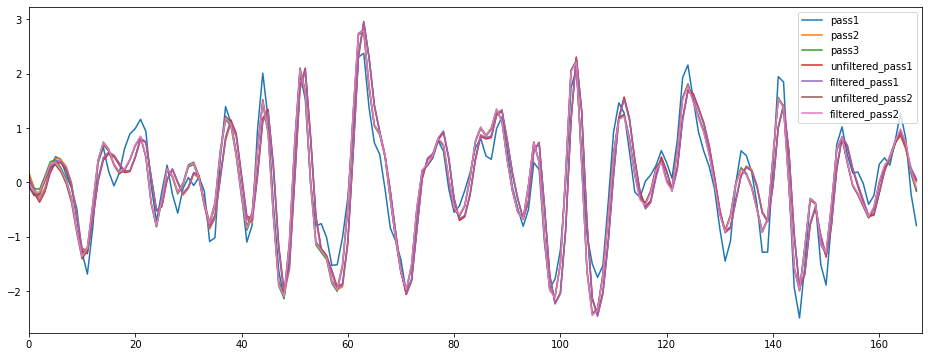

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))

regressor_file = "out/output_desc-movingregressor_timeseries.tsv"
df = pd.read_table(regressor_file)

for col in df.columns:
    ax.plot(df[col].values, label=col)

regressor_file = "out/output_desc-refinedmovingregressor_timeseries.tsv"
df = pd.read_table(regressor_file)

for col in df.columns:
    ax.plot(df[col].values, label=col)

ax.set_xlim(0, df.shape[0])
ax.legend()
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


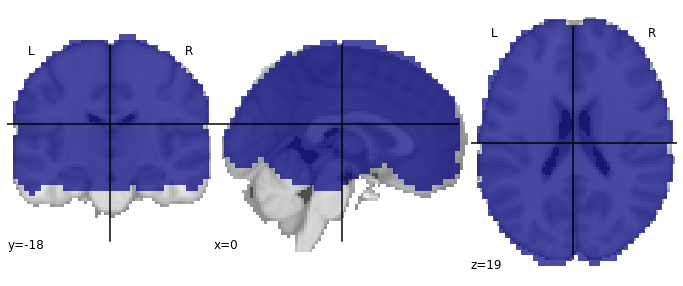

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
plotting.plot_roi("out/output_desc-processed_mask.nii.gz", axes=ax)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


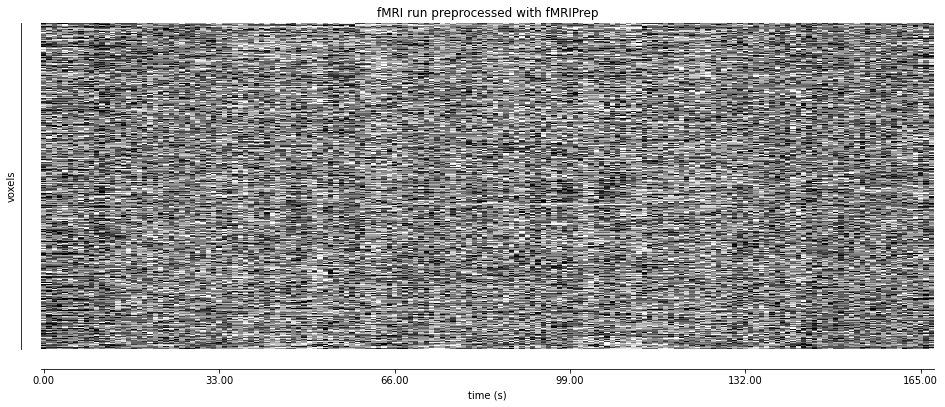

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


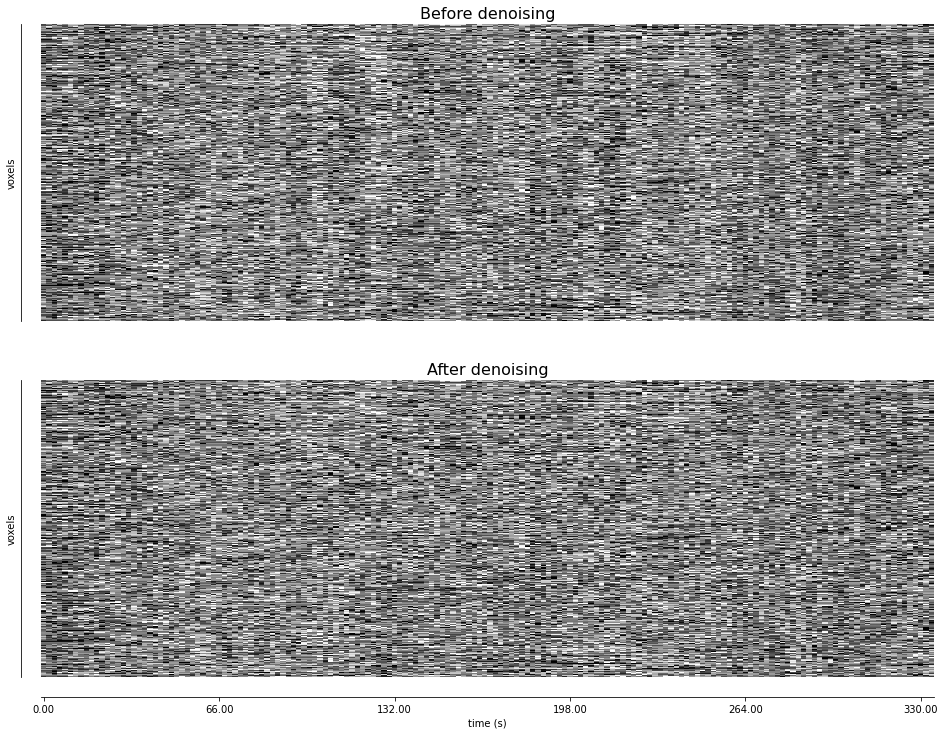

In [18]:
fig, axes = plt.subplots(figsize=(16, 12), nrows=2)
plotting.plot_carpet(func, mask_img=mask, axes=axes[0])
axes[0].set_title("Before denoising", fontsize=16)
axes[0].set_xlabel("")
axes[0].set_xticks([])
axes[0].spines["bottom"].set_visible(False)

plotting.plot_carpet("out/output_desc-lfofilterCleaned_bold.nii.gz", mask_img=mask, axes=axes[1])
axes[1].set_title("After denoising", fontsize=16)
#fig.tight_layout()
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


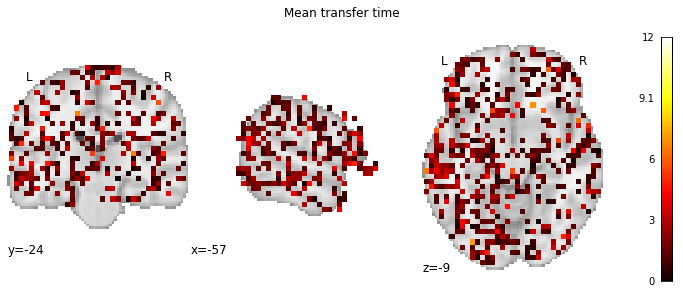

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
plotting.plot_stat_map("out/output_desc-MTT_map.nii.gz", draw_cross=False, axes=ax)
ax.set_title("Mean transfer time")
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


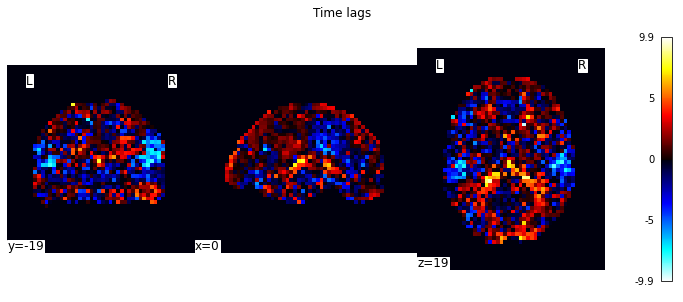

In [11]:
# This map has non-zero values outside the mask, which makes plotting difficult
fig, ax = plt.subplots(figsize=(12, 5))
plotting.plot_stat_map("out/output_desc-maxtime_map.nii.gz", draw_cross=False, axes=ax)
ax.set_title("Time lags")
fig.show()